In [31]:
pip install numpy pandas matplotlib tensorflow scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [33]:
data=pd.read_excel('predict_energy_consumption.xlsx')
data.head()

,temperature,humidity,wind_speed,solar_irradiance,energy_consumption
0,24.363503,31.107976,5.234114,705.432695,307.398145
1,38.767858,52.514057,4.939576,817.013258,412.444548
2,33.299849,72.376750,18.125092,325.421109,392.072418
3,29.966462,63.933493,4.990924,662.386690,119.254957
4,18.900466,68.393669,5.438995,614.571385,117.162261


In [34]:
x=data[['temperature','humidity','wind_speed','solar_irradiance']].values
y=data['energy_consumption'].values

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [36]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [37]:
model=Sequential([
    Dense(64,activation='relu', input_shape=(x_train.shape[1],)),
    Dense(32,activation='relu'),
    Dense(1)
])

D:\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
model.compile(optimizer='adam',loss='mse',metrics=['mae'])

In [39]:
history=model.fit(x_train,y_train,epochs=50,batch_size=32,validation_split=0.2,verbose=1)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 92611.7969 - mae: 275.9977 - val_loss: 83692.6719 - val_mae: 258.9911
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 87990.6953 - mae: 267.6635 - val_loss: 83179.1016 - val_mae: 257.9804
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 89358.1953 - mae: 270.3224 - val_loss: 82399.7578 - val_mae: 256.4449
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 91166.1875 - mae: 273.1801 - val_loss: 81208.6641 - val_mae: 254.0829
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 85543.6641 - mae: 262.5876 - val_loss: 79413.8359 - val_mae: 250.4812
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 79793.6094 - mae: 251.3046 - val_loss: 76783.0234 - val_mae: 245.1044
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 81036.3047 - mae: 254.2628 - val_loss: 73156.2031 - val_mae: 237.4932
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 75631.7891 - mae: 242.8867 - val_loss: 68468.

In [40]:
test_loss, test_mae = model.evaluate(x_test, y_test, verbose=1)
print(f"Test Mean Absolute Error: {test_mae:.2f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 17986.6660 - mae: 115.1814  
Test Mean Absolute Error: 115.40


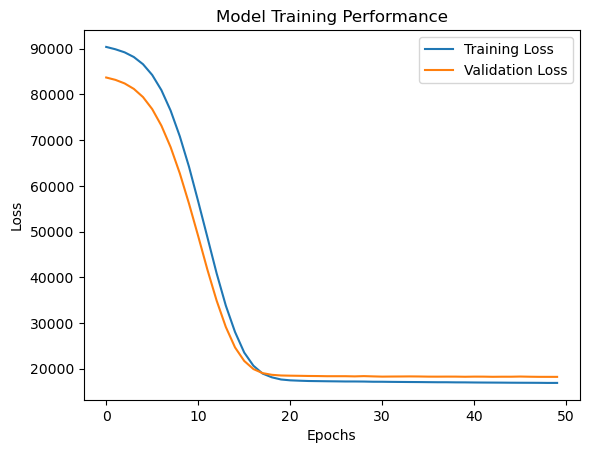

In [41]:
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Training Performance')
plt.legend()
plt.show()

In [42]:
predictions=model.predict(x_test)
predictions

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


array([[294.2687 ],
       [258.8975 ],
       [256.76678],
       [210.81158],
       [337.75092],
       [309.83563],
       [319.71695],
       [300.7282 ],
       [288.83   ],
       [280.66357],
       [241.36725],
       [267.74582],
       [278.71933],
       [238.0278 ],
       [277.21518],
       [312.25943],
       [254.8934 ],
       [322.43387],
       [299.9042 ],
       [244.00093],
       [270.2983 ],
       [286.5568 ],
       [268.81058],
       [267.84012],
       [250.04169],
       [244.18326],
       [258.77896],
       [312.62427],
       [307.71054],
       [273.03748],
       [236.98048],
       [313.97116],
       [297.30203],
       [268.68787],
       [312.84262],
       [298.61105],
       [217.17516],
       [263.48514],
       [283.97302],
       [239.63583],
       [240.6578 ],
       [254.39708],
       [250.18936],
       [264.1276 ],
       [269.16882],
       [260.38614],
       [264.23538],
       [249.42743],
       [289.97546],
       [295.40335],


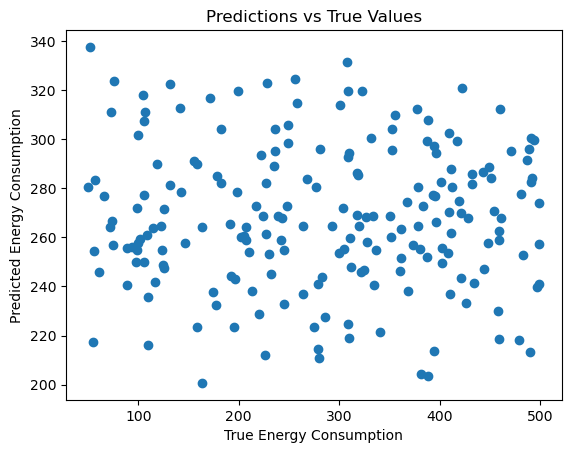

In [43]:
plt.scatter(y_test,predictions)
plt.xlabel('True Energy Consumption')
plt.ylabel('Predicted Energy Consumption')
plt.title('Predictions vs True Values')
plt.show()